In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


In [4]:
model = VGG16(weights='imagenet', include_top=True) #Load alredy pre-trained model
model.summary() #Print a list of layers with all the details

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

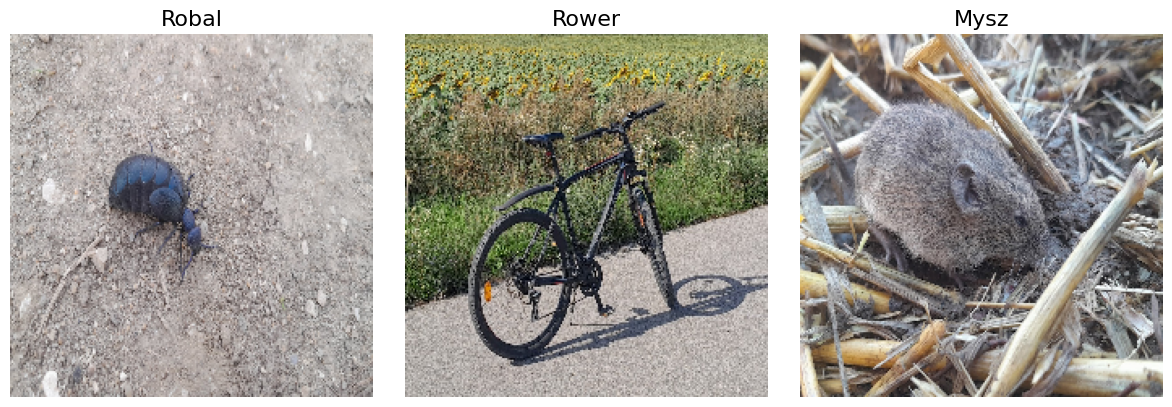

In [26]:
#Further on, each time you will need to complete the code, it will be marked by #TODO
 
# Assign image titles for your images
image_titles = ['Robal', 'Rower', 'Mysz']
 
# Load images and reshape them
img1 = load_img('robal.jpg', target_size=(224, 224))
img2 = load_img('rower.jpg', target_size=(224, 224))
img3 = load_img('MYSZ.jpg', target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.
 
# Convert them to a Numpy array
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])
 
# Preparing input data for VGG16
X = preprocess_input(images)
#TODO apply preprocessing function specific to VGG network (you have already imported it)
 
# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [37]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(X) #TODO feed images into the network and see the results (use "predict" function)
best_class = [np.argmax(im_preds) for im_preds in preds] #TODO find the best class (use argmax or argsort function)
 
for i, _ in enumerate(images):
    print('Predicted:', decode_predictions(preds, top=3)[i]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted: [('n02172182', 'dung_beetle', 0.9878308), ('n01986214', 'hermit_crab', 0.0025225612), ('n02167151', 'ground_beetle', 0.0020812708)]
Predicted: [('n03792782', 'mountain_bike', 0.45307678), ('n03967562', 'plow', 0.17549501), ('n02835271', 'bicycle-built-for-two', 0.12775718)]
Predicted: [('n02137549', 'mongoose', 0.81885016), ('n02325366', 'wood_rabbit', 0.07766212), ('n02442845', 'mink', 0.027857328)]
Predicted: [('n02137549', 'mongoose', 0.9265905), ('n01748264', 'Indian_cobra', 0.04478971), ('n02138441', 'meerkat', 0.027224062)]


In [8]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

from matplotlib import cm

In [ ]:
def visualise_heatmap(map, images):
  f, ax = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(map[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

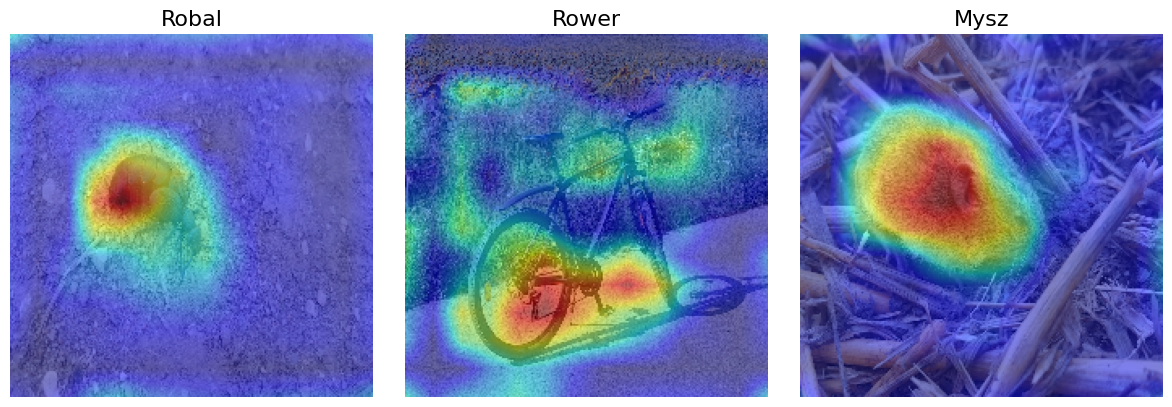

In [25]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))
 
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)
 
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap(cam, images)

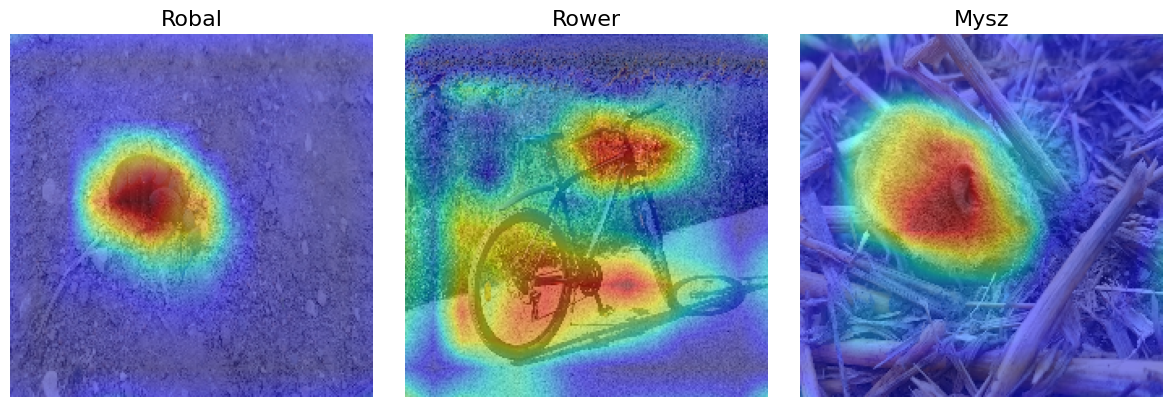

In [26]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)
 
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap(cam, images)

d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_46
Received: inputs=('Tensor(shape=(32, 224, 224, 3))',)
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step


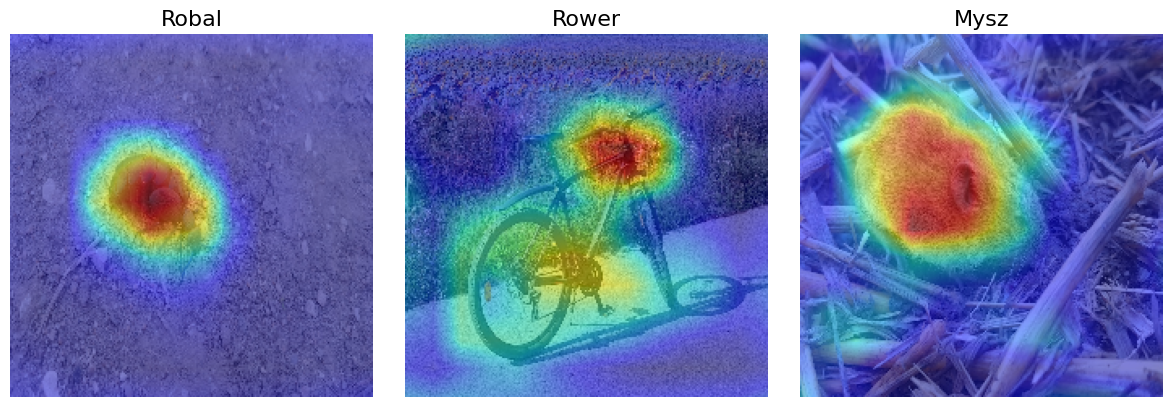

In [29]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap(cam,images)

d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_46
Received: inputs=['Tensor(shape=(3, 224, 224, 3))']
  warnings.warn(msg)


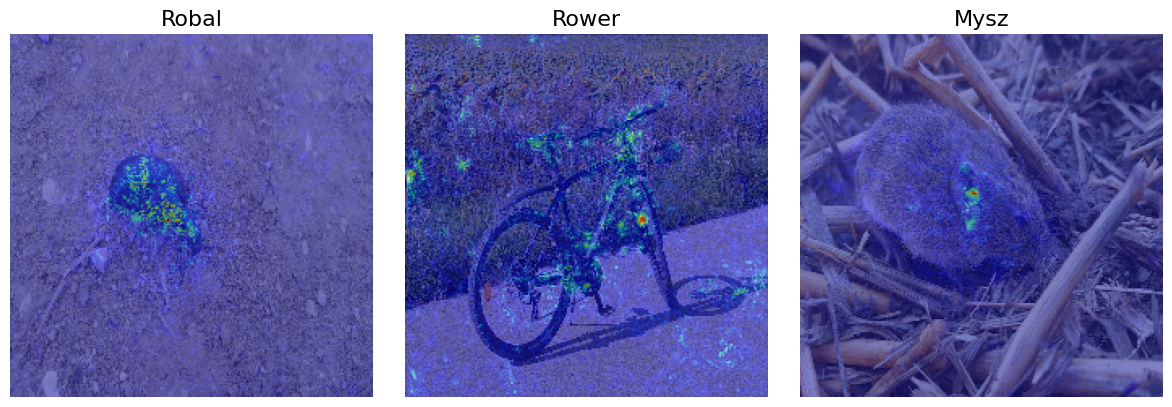

In [31]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)
visualise_heatmap(saliency_map, images)

d:\programowanie\Python\ML2\ml_env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_46
Received: inputs=['Tensor(shape=(3, 224, 224, 3))']
  warnings.warn(msg)


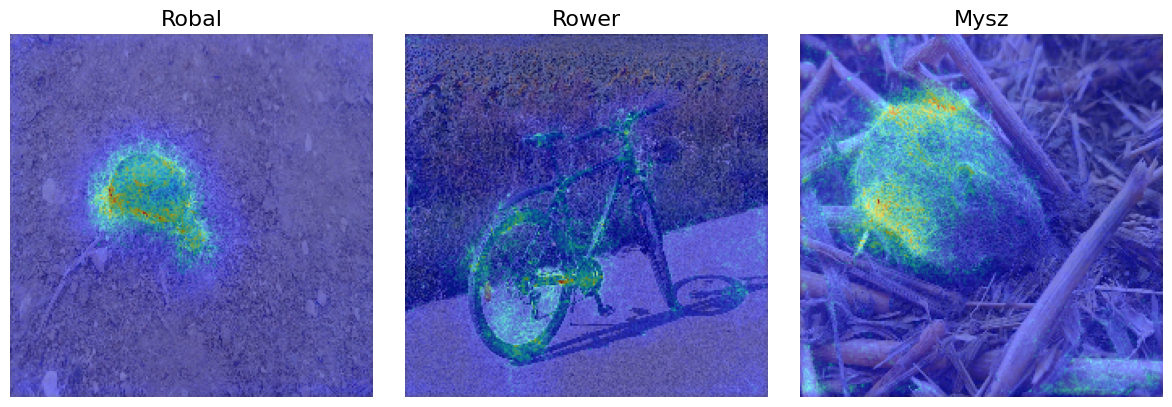

In [ ]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)


visualise_heatmap(saliency_map,images)


In [10]:
 
img4 = load_img('Mangusta_i_kobra.jpg', target_size=(224, 224))
images = np.asarray([np.array(img4)])
X = preprocess_input(images)
preds = model.predict(X)

best_class = [np.argsort(preds[0])[0]]
second_best_class = [np.argsort(preds[0])[1]]
fifth_best_class = [np.argsort(preds[0])[4]]

print('Predicted:', decode_predictions(preds, top=5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
Predicted: [[('n02137549', 'mongoose', 0.9265907), ('n01748264', 'Indian_cobra', 0.044789545), ('n02138441', 'meerkat', 0.027224015), ('n02441942', 'weasel', 0.00037826726), ('n01687978', 'agama', 0.00019988643)]]


In [17]:
def visualise_heatmap2(map, image):
  f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
  heatmap = np.uint8(cm.jet(map[0])[..., :3] * 255)
  ax.imshow(image)
  ax.imshow(heatmap, cmap='jet', alpha=0.5)
  ax.axis('off')
  plt.tight_layout()
  plt.show()

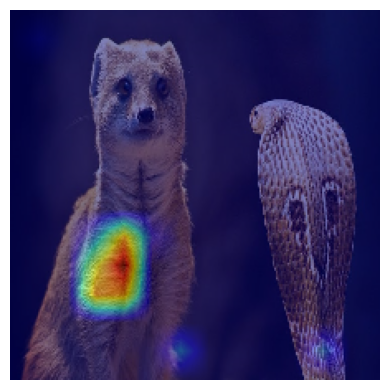

In [18]:
replace2linear = ReplaceToLinear()
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

score = CategoricalScore(list(best_class))
cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap2(cam, images[0])

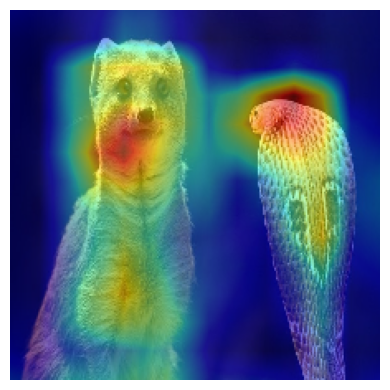

In [19]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)
 
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap2(cam, images[0])

In [ ]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap2(cam,images[0])

In [ ]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map, images[0])

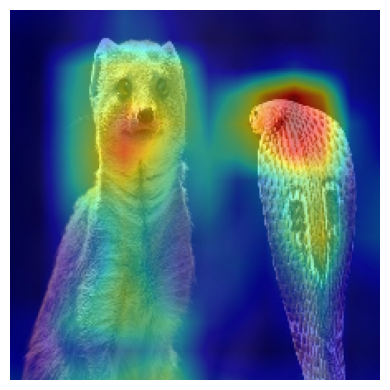

In [22]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

score = CategoricalScore(list(second_best_class))
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap2(cam, images[0])

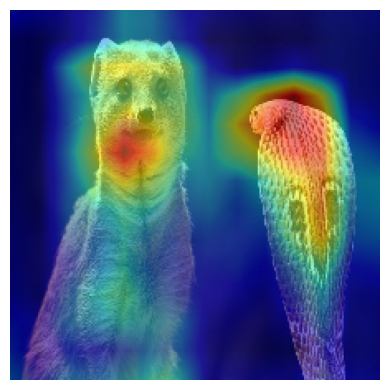

In [23]:
score = CategoricalScore(list(fifth_best_class))
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap2(cam, images[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


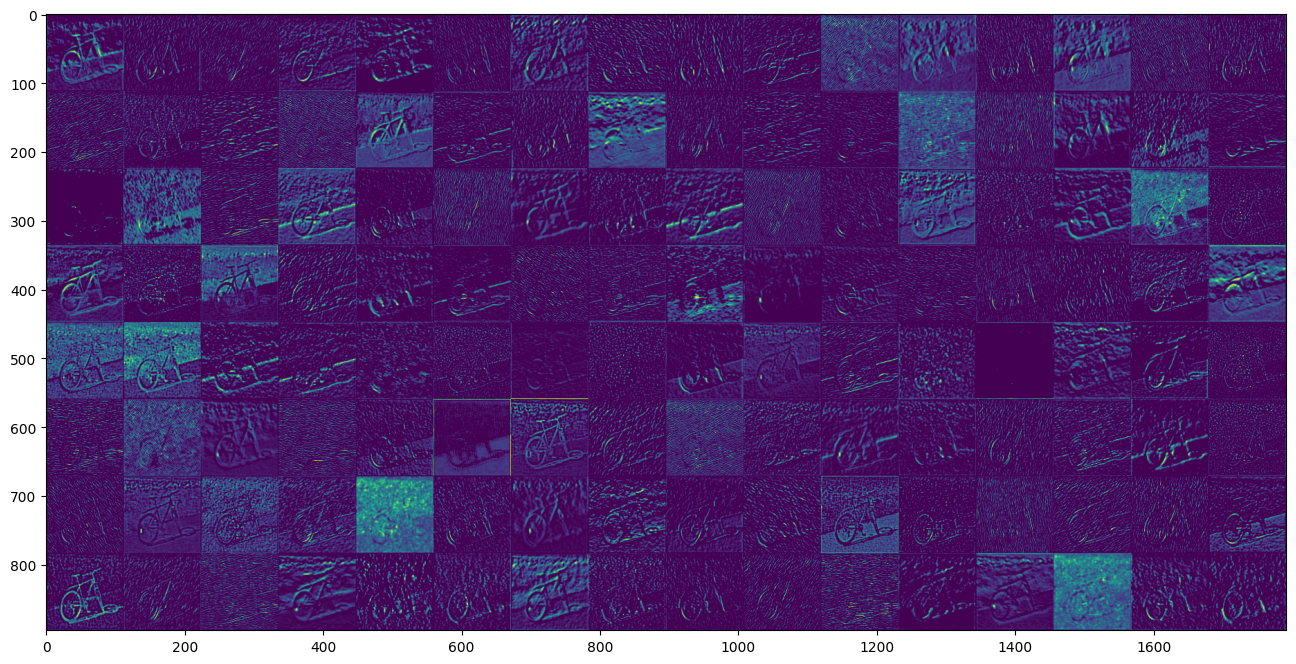

In [33]:
layer_outputs = [layer.output for layer in model.layers] #Loop through the model defined in the beginning to access outputs of individual layers
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = np.reshape(img2, (1,224,224,3))
activations = activation_model.predict(X_reshaped)
 
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block2_conv2': #TODO Specify the name of the layer that you want to see. Choose one name from the model summary we printed in the beginning
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')